/home/kaiwen/anaconda3/envs/common-descent/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/kaiwen/anaconda3/envs/common-descent/lib/python3.9/site-packages/linear_operator/operators/_linear_operator.py:937: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  diag = torch.tensor(jitter_val, dtype=self.dtype, device=self.device)
  0%|                                                                                                                                                                              | 0/200 [00:00<?, ?it/s]/home/kaiwen/Desktop/local-bo-convergence/zoofoo/BFGS/LBFGS.py:296: UserWarning: This overload of add_ is deprecated:
	add_(Number 

torch.Size([5, 2])
torch.Size([5])


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 246.66it/s, loss=-1.48, ls=0.571, os=0.0471, sn=0.0001]


nabla mu tensor([0.0149, 0.9831], device='cuda:0')
tensor([[ 1.2409e-04, -2.9227e-06, -1.4988e-06],
        [-2.9227e-06,  7.4412e-03,  4.7073e-06],
        [-1.4988e-06,  4.7073e-06,  7.4343e-03]], device='cuda:0')
trace 0.014875535428384434


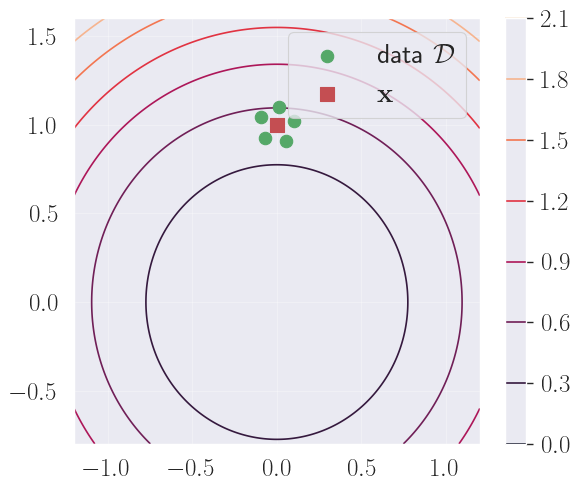

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [1]:
import random

import numpy as np

import torch

import matplotlib.pyplot as plt
import seaborn as sns

from gradient_estimation import test


def ff(x, noise_std=1e-2):
    n, d = x.size()
    center = torch.tensor([0., 0.], dtype=x.dtype, device=x.device).unsqueeze(-2)
    return 0.5 * (x - center).square().sum(dim=-1) + noise_std * torch.randn(n, device=x.device)


def l1(x, noise_std=1e-2):
    n, d = x.size()
    return x.abs().sum(dim=-1) + noise_std * torch.randn(n, device=x.device)


torch.set_default_dtype(torch.float64)

seed = 4321

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

device = "cuda:0"

x = torch.tensor([0., 1.], device=device).unsqueeze(-2)

g, train_x, train_y = test(objective=lambda x: ff(x, noise_std=0.01), x=x, batch_size=5, device=device)
# g, train_x, train_y = test(objective=lambda x: ff(x, noise_std=0.01), x=x, batch_size=10, device=device)
# g, train_x, train_y = test(objective=lambda x: l1(x, noise_std=0.01), x=x, batch_size=5, device=device)
# g, train_x, train_y = test(objective=lambda x: l1(x, noise_std=0.01), x=x, batch_size=10, device=device)

fig = plt.figure(figsize=(6, 5))

sns.set_theme()
sns.set_context("paper")
sns.set_style("darkgrid")

g = g.mean[1:].cpu().numpy()
x = x.cpu().numpy()
train_x = train_x.cpu().numpy()

xx = np.linspace(-1.2, 1.2, num=500)
yy = np.linspace(-0.8, 1.6, num=500)
xs, ys = np.meshgrid(xx, yy)
levels = 0.5 * (xs ** 2 + ys ** 2)
# levels = abs(xs) + abs(ys)
plt.contour(xs, ys, levels, 6, zorder=1)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=18)

# plt.plot(np.linspace(-1, 1), [1] * 50, color='b', linestyle='--', linewidth=3, label='subgradient', zorder=2)
plt.scatter(train_x[:, 0], train_x[:, 1], alpha=1, s=80, c='g', label=r'data $\mathcal{D}$', zorder=3)
plt.scatter(x[0, 0], x[0, 1], marker='s', alpha=1., s=110, c='r', label=r'$\mathbf{x}$', zorder=4)

plt.xlim(-1.2, 1.2)
plt.ylim(-0.8, 1.6)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=20)

plt.tight_layout()
plt.show()